------ Data Mining Results ------
Total Sleep Hours Statistics:
count    5000.000000
mean        6.974902
std         1.454033
min         4.500000
25%         5.690000
50%         6.960000
75%         8.210000
max         9.500000
Name: Total Sleep Hours, dtype: float64
 
Statistics by Gender:
        mean  median  count   std
Gender                           
Female  6.98    6.93   1675  1.44
Male    6.99    6.92   1718  1.46
Other   6.96    7.00   1607  1.46
 
Statistics by Age Group:
           mean  median  count   std
Age Group                           
18-25      6.97    6.93    974  1.47
26-35      7.06    7.08   1163  1.44
36-45      6.90    6.90   1154  1.43
46-55      6.98    6.97   1195  1.47
56+        6.95    6.94    514  1.49
 
Missing Data Count:
Date: 0
Person_ID: 0
Age: 0
Gender: 0
Sleep Start Time: 0
Sleep End Time: 0
Total Sleep Hours: 0
Sleep Quality: 0
Exercise (mins/day): 0
Caffeine Intake (mg): 0
Screen Time Before Bed (mins): 0
Work Hours (hrs/day): 0
Producti

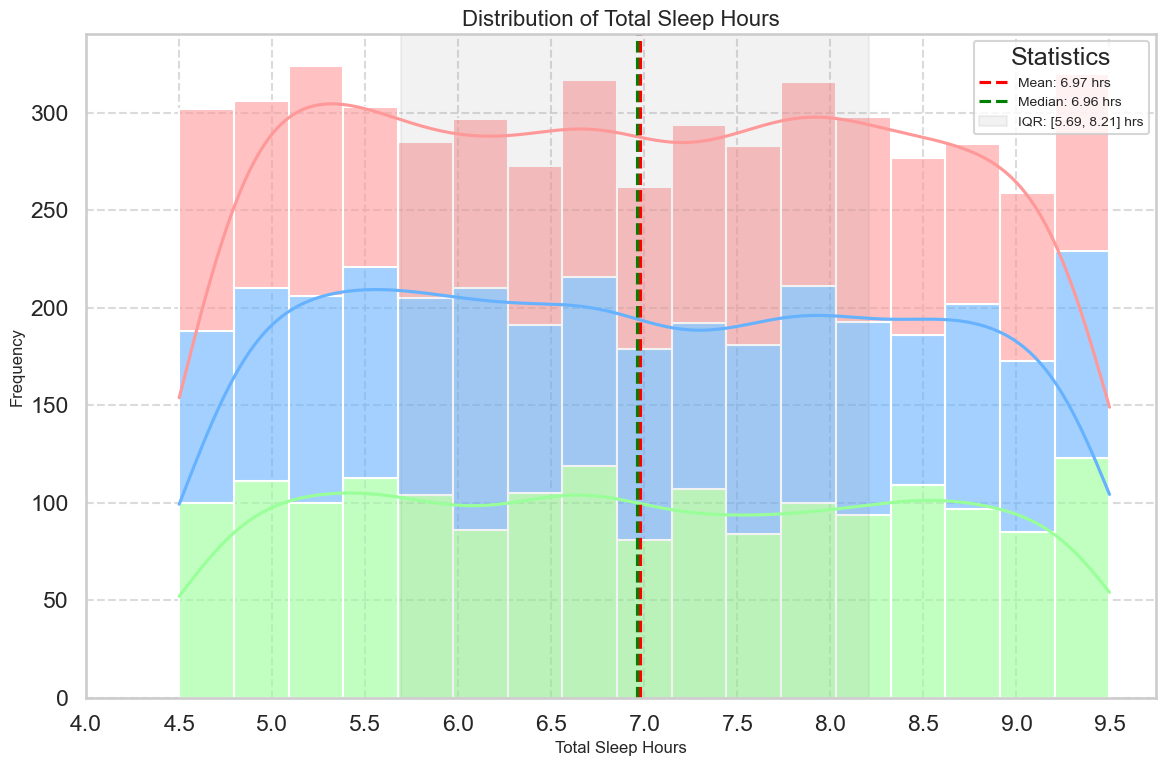

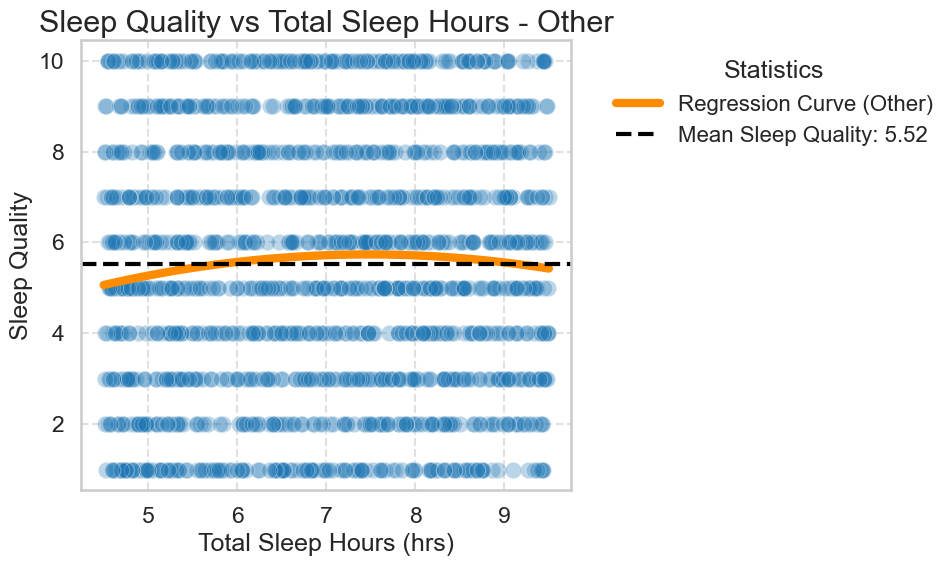

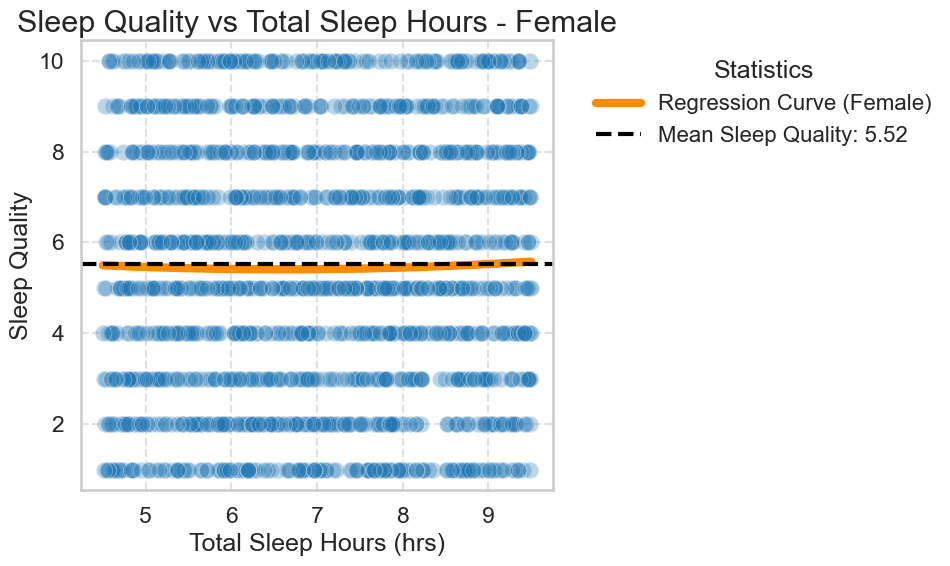

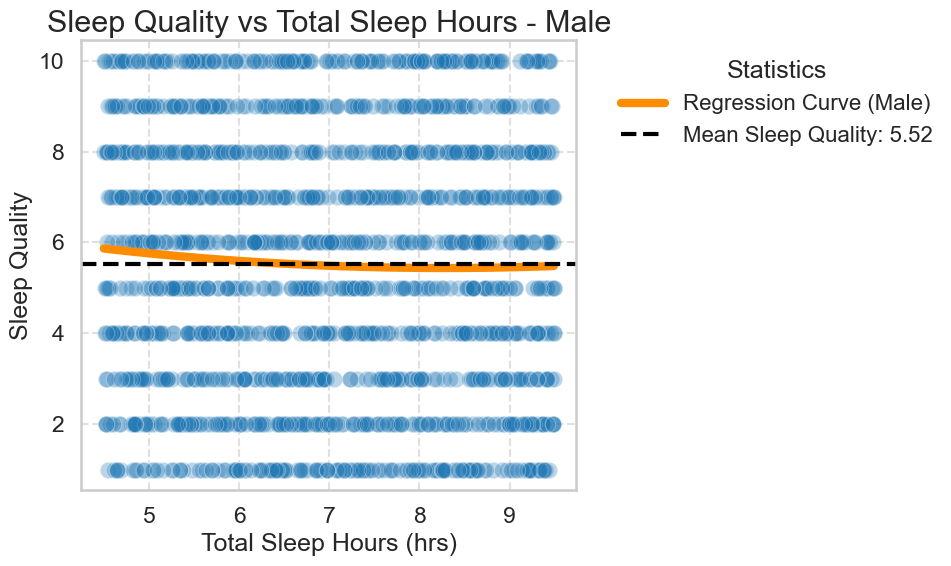

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, f_oneway

# Load data
data = pd.read_csv(r"C:\Users\10759\Desktop\sleep_cycle_productivity.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Set style
sns.set_style('whitegrid')
sns.set_context('talk')

# Data mining
def analyze_data(df):
    print("------ Data Mining Results ------")
    print("Total Sleep Hours Statistics:")
    print(df['Total Sleep Hours'].describe())

    gender_stats = df.groupby('Gender')['Total Sleep Hours'].agg(['mean', 'median', 'count', 'std']).round(2)
    print(" ")
    print("Statistics by Gender:")
    print(gender_stats)

    bins = [18, 26, 36, 46, 56, df['Age'].max() + 1]
    labels = ['18-25', '26-35', '36-45', '46-55', '56+']
    df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    age_stats = df.groupby('Age Group', observed=False)['Total Sleep Hours'].agg(['mean', 'median', 'count', 'std']).round(2)
    print(" ")
    print("Statistics by Age Group:")
    print(age_stats)

    missing = df.isnull().sum()
    print(" ")
    print("Missing Data Count:")
    for column, count in missing.items():
        print(f"{column}: {count}")

    Q1 = df['Total Sleep Hours'].quantile(0.25)
    Q3 = df['Total Sleep Hours'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Total Sleep Hours'] < (Q1 - 1.5 * IQR)) | (df['Total Sleep Hours'] > (Q3 + 1.5 * IQR))]
    print(" ")
    print(f"Outliers (IQR): {len(outliers)}")

    pearson = df['Total Sleep Hours'].corr(df['Sleep Quality'])
    spearman, _ = spearmanr(df['Total Sleep Hours'], df['Sleep Quality'])
    print(" ")
    print(f"Pearson Correlation: {pearson:.2f}")
    print(f"Spearman Correlation: {spearman:.2f}")

    f_stat, p_val = f_oneway(
        df[df['Gender'] == 'Female']['Total Sleep Hours'],
        df[df['Gender'] == 'Male']['Total Sleep Hours'],
        df[df['Gender'] == 'Other']['Total Sleep Hours']
    )
    print(" ")
    print(f"ANOVA Results - F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

# Visualization
def plot_data(df):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x='Total Sleep Hours', hue='Gender', multiple='stack', palette=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.6, kde=True)
    mean = df['Total Sleep Hours'].mean()
    median = df['Total Sleep Hours'].median()
    q1, q3 = df['Total Sleep Hours'].quantile([0.25, 0.75])
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f} hrs')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f} hrs')
    plt.axvspan(q1, q3, color='gray', alpha=0.1, label=f'IQR: [{q1:.2f}, {q3:.2f}] hrs')
    plt.title('Distribution of Total Sleep Hours', fontsize=16)
    plt.xlabel('Total Sleep Hours', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Statistics', fontsize=10)
    plt.xticks(np.arange(4, 10, 0.5))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(r'C:\Users\10759\Desktop\sleep_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    for gender in df['Gender'].unique():
        subset = df[df['Gender'] == gender]
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=subset, x='Total Sleep Hours', y='Sleep Quality', alpha=0.3, s=140, edgecolor='white', linewidth=0.7)
        coeffs = np.polyfit(subset['Total Sleep Hours'], subset['Sleep Quality'], 2)
        poly = np.poly1d(coeffs)
        x_range = np.linspace(min(subset['Total Sleep Hours']), max(subset['Total Sleep Hours']), 100)
        plt.plot(x_range, poly(x_range), color='darkorange', linewidth=6, label=f'Regression Curve ({gender})')
        mean_quality = df['Sleep Quality'].mean()
        plt.axhline(mean_quality, color='black', linestyle='--', linewidth=3, label=f'Mean Sleep Quality: {mean_quality:.2f}')
        plt.title(f'Sleep Quality vs Total Sleep Hours - {gender}', fontsize=22)
        plt.xlabel('Total Sleep Hours (hrs)', fontsize=18)
        plt.ylabel('Sleep Quality', fontsize=18)
        plt.legend(title='Statistics', fontsize=16, loc='upper left', frameon=False, bbox_to_anchor=(1.05, 1))
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(fr'C:\Users\10759\Desktop\sleep_quality_vs_hours_{gender}.png', dpi=300, bbox_inches='tight')
        plt.show()

# Execute analysis
analyze_data(data)
plot_data(data)